# **Postgraduate AI Business Architect**

# Titanic


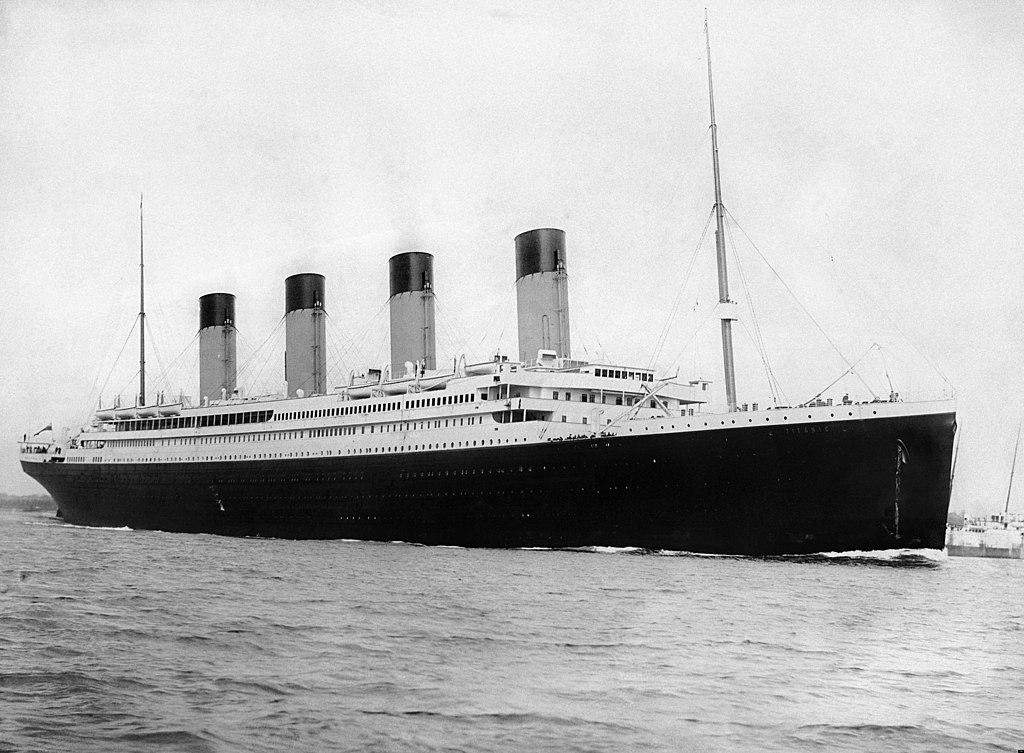



## 0. Intro

### 0.1 General information



  Notebooks consists out of a list of cells.
  
  There are multiple types, but the 3 most common are:
   1. Markdown: For documentation
   2. Shell commands: To execute shell commands in the current environment.
        It's possible to see files, create directories, download new files, ...
   3. Code: To enter source code of a specific programming language.
     
   The code is executed in a run-time (a.k.a. the current environment).
   Depending the "used kernel" the code is executed as Python, Scale, Jullia, R, ...
   Most of the time this is Python. (In this course, it will be exclusively Python.)

   Each cell can be individually executed. It's advised to run the cells top-down.
   Constructs (variables, object, functions, ...) will be accessible and usable
   in other cells that executed after the one that defines the construct.


### 0.2 Libraries



* **Pandas (pd)**: https://pandas.pydata.org/docs/reference/index.html

   Software library for data manipulation and analysis.
   (Written in Python and C)

   Few of its features:
   - DataFrame object for data manipulation with integrated indexing.
   - Tools for reading and writing data between in-memory data structures and different file formats.
   - Data alignment and integrated handling of missing data.
   - Data structure column insertion and
   - Data set merging and joining.
   - ...
     
* **Numpy (np)**: https://numpy.org/doc/stable/user/whatisnumpy.html

   NumPy is the fundamental package needed for scientific computing with Python.

   Few of its features:
   - a powerful N-dimensional array object
   - sophisticated (broadcasting) functions
   - tools for integrating C/C++ and Fortran code
   - useful linear algebra, Fourier transform, and random number capabilities


* **Matplotlib Pyplot (plt)**: https://matplotlib.org/stable/api/index.html

  Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

  Few of its features:
    - Create publication quality plots.
    - Make interactive figures that can zoom, pan, update.
    - Customize visual style and layout.
    - Export to many file formats .
    - Embed in JupyterLab and Graphical User Interfaces.
    - Use a rich array of third-party packages built on Matplotlib.

* **Seaborn (sns)**: https://seaborn.pydata.org/api.html

   Seaborn is a Python data visualization library based on matplotlib. 
   It provides a high-level interface for drawing attractive and informative statistical graphics.

* **StackOverflow**: https://stackoverflow.com/ ;-)


## 1. Data representation & cleaning

### 1.0 Initial setup

We start by importing the necessary libraries.

pd / np / plt / sns are the common short-end names for these libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

Enable autocomplete (using tab).

In [2]:
%config Completer.use_jedi = False

In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

### 1.1 Loading the data

We can use shell commands in jupyter by using 
`!`

In [4]:
!ls

1-imdb-classifier-ulmfit.ipynb	pgaiba_1_titanic_data_preprocessing.ipynb
TestGPU.ipynb			pgaiba_2_titanic_model_training.ipynb
empty.ipynb			requirements_new.txt
label_saves			titanic.csv
new_directory


In [5]:
!mkdir new_directory

mkdir: cannot create directory ‘new_directory’: File exists


In [6]:
!ls

1-imdb-classifier-ulmfit.ipynb	pgaiba_1_titanic_data_preprocessing.ipynb
TestGPU.ipynb			pgaiba_2_titanic_model_training.ipynb
empty.ipynb			requirements_new.txt
label_saves			titanic.csv
new_directory


We use the `read_csv` function to read in the dataset ('titanic.csv').

You can always use `?` or `??` to see the documentation on a function in this notebook. Two question marks will show you the implementation details as well.
   * `?pd.read_csv`
   * `??read_csv`

In [7]:
?pd.read_csv

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'list[HashableT] | Callable[[Hashable], bool] | None' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Sequence[str] | Mapping[str, Sequence[str]] | None' = None,
    keep_default_na: 'bool' = True,
    n

The Titanic data set:

A sample from the RMS Titanic passenger list, which sank on April 15 1912, killing 1502 out of 2224 passengers and crew.

The data set used in this notebook contains 891 rows, let's check it out!


In [8]:
df = pd.read_csv('titanic.csv')

Using the function `head()` we can look at the first x records in the dataset.

In [9]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**TODO**: display the last 10 records in the dataset.

In [10]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


We can find out the dimensions of our dataset using `shape`.

In [11]:
df.shape

(891, 12)

Our dataset contains 891 records with 12 columns for each record. But what do all these columns mean? Let's start by looking at the information that was supplied with the dataset.

In [12]:
#from IPython.display import Image
#Image(filename='data_table.png', width=720) 

The `describe()` function provides us with a nice statistical overview of the contents of our dataset.

In [13]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


This helps us determine, among other early insights, how representative the training dataset is with regard to the actual problem domain.

Numerical values:
* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* Survived is a categorical feature with 0 or 1 values.
* Around 38% samples survived representative of the actual survival rate at 32%.
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers (<1%) within age range 65-80.

Categorical values:
* Names are unique across the dataset (count=unique=891)
* Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
* Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
* Embarked takes three possible values. S port used by most passengers (top=S)
* Ticket feature has high ratio (22%) of duplicate values (unique=681).



In [14]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- int64: "Integer" (Geheel getal in Dutch.)
- float64: "Floating point number." (Kommagetal in Dutch.)
- Object: This can be anything, but in the Titanic data set, it's most likely a string. (A "tekenreeks" or "stukje tekst" in Dutch."

### 1.2 Visualizing the data

The `describe()` function already gave us some early insights into the data. But a painting is valued at a millenary morphemes, so let's start visualizing our data!

<Axes: xlabel='Survived', ylabel='count'>

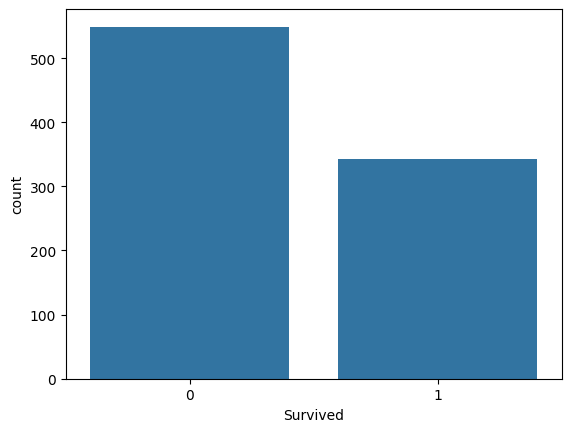

In [15]:
# A countplot show the counts of observations in each categorical bin using bars.
# It can be thought of as a histogram across a categorical variable.
sns.countplot(x='Survived', data=df)

#### 1.2.1 Sex difference

First we are going to look at how many male/females there were aboard and how many of them died/survived for each category.

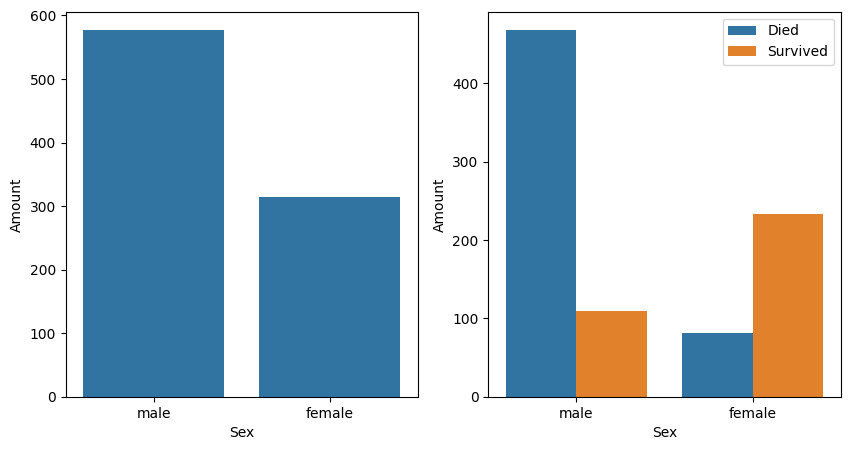

In [16]:
# This is used to make multiple plots in one figure
fig, ax = plt.subplots(1,2, figsize=(10,5))

# A countplot show the counts of observations in each categorical bin using bars.
# It can be thought of as a histogram across a categorical variable.
sns.countplot(x='Sex', data=df, ax=ax[0])
sns.countplot(x='Sex', data=df, hue='Survived', ax=ax[1])

# ax[<index>] indicates which of the 2 subplots you're filling in
ax[0].set_xlabel('Sex')
ax[0].set_ylabel('Amount')

ax[1].set_xlabel('Sex')
ax[1].set_ylabel('Amount')
ax[1].legend(['Died', 'Survived'])

fig.show()

We see that more men died than women in general and that more than half of the women survived.

#### 1.2.2 Ticket classes
Another interesting feature to look at are the classes (Pclass) each passenger had reserved. In the dataset there are 3 different classes: first class, second class and third class.

**TODO**: 
* Create a chart that displays the number of survivors and deaths per Pclass category (similar to the second chart in the previous figure)
* Create a chart that combines Sex and Pclass to display the number of deaths

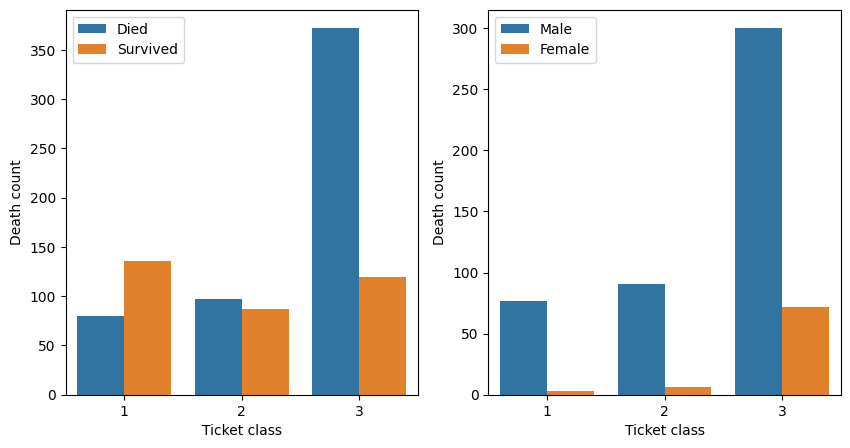

In [17]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.countplot(x='Pclass', data=df, hue='Survived', ax=ax[0])
sns.countplot(x='Pclass', data=df[df['Survived'] == 0], hue='Sex', ax=ax[1])

ax[0].set_xlabel('Ticket class')
ax[0].set_ylabel('Death count')
ax[0].legend(['Died', 'Survived'])

ax[1].set_xlabel('Ticket class')
ax[1].set_ylabel('Death count')
ax[1].legend(['Male', 'Female'])

fig.show()

When we look at these charts, we can see that the amount of passengers died in third class is far higher than the other classes. The amount of male and female deaths in the first and second class are almost equal, yet there is a clear difference in the third class. Not a great time and place to be a lower class male...

So who are these lower class male survivors. Perhaps we can zoom in on them to gain some insight:

In [18]:
df_male_lowclass_survivors = df[(df['Survived'] == 1) & (df['Sex'] == 'male') & (df['Pclass'] == 3)]

In [19]:
df_male_lowclass_survivors

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
74,75,1,3,"Bing, Mr. Lee",male,32.00,0,0,1601,56.4958,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.00,0,0,345779,9.5000,NaN,S
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.00,0,0,C 17369,7.1417,NaN,S
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.00,0,0,350043,7.7958,NaN,S
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.00,0,2,363291,20.5250,NaN,S
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.00,0,0,A/5 3540,8.0500,NaN,S


In [20]:
df_male_lowclass_survivors.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,47.0,NaN,NaN,NaN,447.638298,255.919776,37.0,241.5,430.0,679.0,870.0
Survived,47.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Pclass,47.0,NaN,NaN,NaN,3.0,0.0,3.0,3.0,3.0,3.0,3.0
Name,47,47,"Mamee, Mr. Hanna",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,47,1,male,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,38.0,NaN,NaN,NaN,22.274211,11.555786,0.42,16.5,25.0,29.75,45.0
SibSp,47.0,NaN,NaN,NaN,0.340426,0.730592,0.0,0.0,0.0,0.5,4.0
Parch,47.0,NaN,NaN,NaN,0.297872,0.586622,0.0,0.0,0.0,0.0,2.0
Ticket,47,41,1601,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,47.0,NaN,NaN,NaN,15.579696,15.232388,0.0,7.825,8.05,15.82085,56.4958


At a glance, it seems the 'Age' feature might provide us with some more information. Let's look at this feature in detail.

#### 1.2.3 Age

We use a histogram to divide our entire list of passengers in (8) buckets divided by decade.

Text(0, 0.5, 'Amount of passengers')

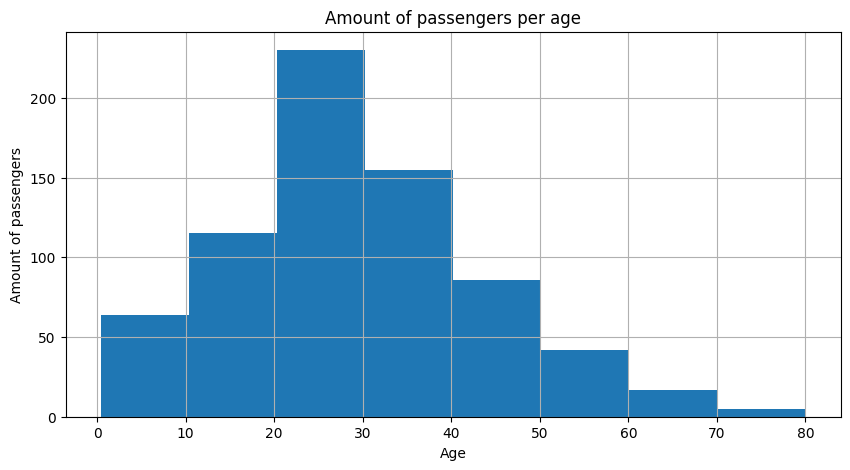

In [21]:
fig = plt.figure(figsize=(10,5))
fig = df['Age'].hist(bins=8)

fig.set_title('Amount of passengers per age')
fig.set_xlabel('Age')
fig.set_ylabel('Amount of passengers')

We'll compare it to a histogram of our lower class male survivors from before:

Text(0, 0.5, 'Amount of passengers')

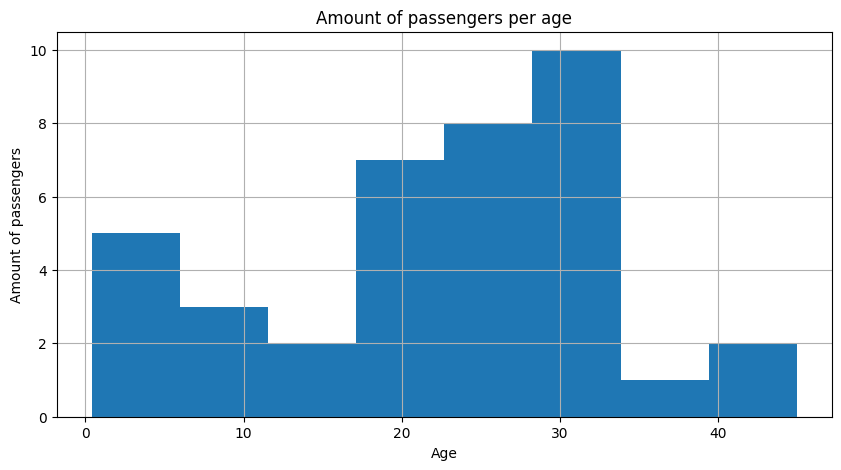

In [22]:
fig = plt.figure(figsize=(10,5))
fig = df_male_lowclass_survivors['Age'].hist(bins=8)

fig.set_title('Amount of passengers per age')
fig.set_xlabel('Age')
fig.set_ylabel('Amount of passengers')

A possible conclusion here is that the bulk of male lower class survivors are either children or young men. 

Another way to represent data is by using boxplots. It simultaneously shows the following information:
* **Minimum** (0th percentile): the lowest data point excluding any outliers (lower horizontal line)
* **Maximum** (100th percentile): the largest data point excluding any outliers (upper horizontal line)
* **Median** (50th percentile): the middle value of the dataset (green line in the box)
* **First quartile** (25th percentile): is the median of the lower half of the dataset (bottom of the box)
* **Third quartile** (75th percentile): is the median of the upper half of the dataset (top of the box)
* **Outliers**: circles

Compare the boxplots to the histograms depicting survival based on age in the figures below it.

(0.0, 140.0)

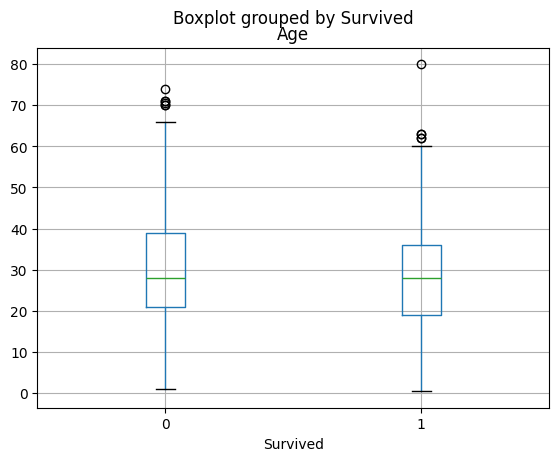

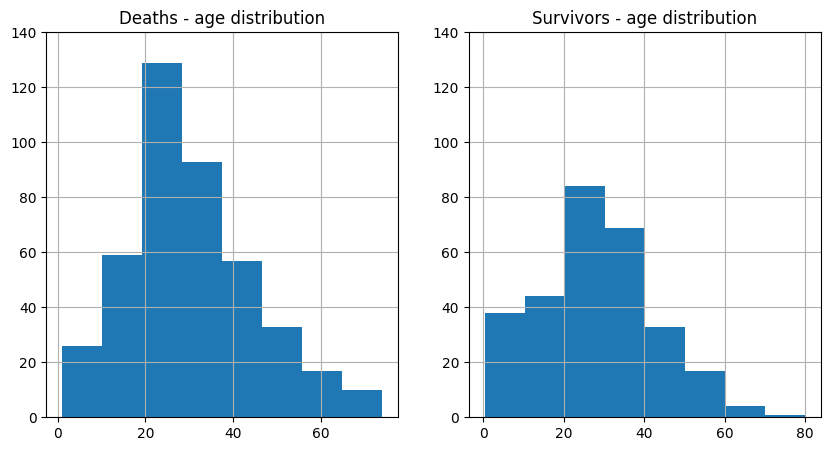

In [23]:
df.boxplot(by = 'Survived', column = 'Age')

fig, ax = plt.subplots(1,2, figsize=(10,5))

df_dead = df[df['Survived'] == 0]
df_dead['Age'].hist(bins=8, ax=ax[0])
ax[0].title.set_text('Deaths - age distribution')
ax[0].set_ylim([0,140])

df_survived = df[df['Survived'] == 1]
df_survived['Age'].hist(bins=8, ax=ax[1])
ax[1].title.set_text('Survivors - age distribution')
ax[1].set_ylim([0,140])

#### Extra: 1.2.4 Children aboard

"Women and children first" is a well known phrase in the ship-sinking world. When we look at the data, there is nothing that says anything directly about children. But we do know the age of all the passengers. By using this age, we can extract the amount of children. We count the passenger as a child when the age is lower than 18 years old.

In order to do this, we are going to add an extra column to the dataframe, named 'adult'. This column has 3 categories: ['male', 'female', 'child']

**TODO**: add the column 'Adult' to the dataframe, you can use apply() to specify a function to apply to the dataframe.

<Axes: xlabel='Pclass', ylabel='count'>

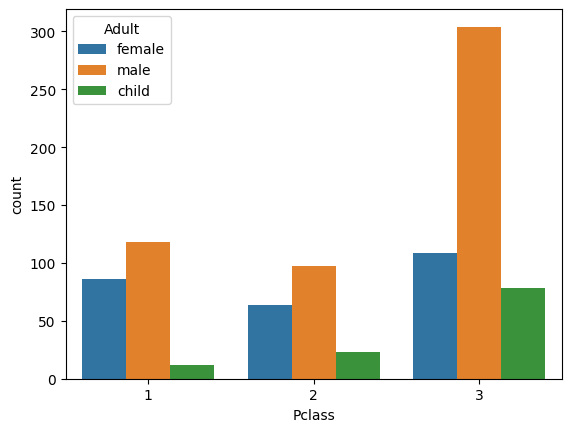

In [24]:
def is_child(row):    
    if(row['Age'] < 18):
        return 'child'
    else:
        return row['Sex']

df_adult = df.copy()
df_adult['Adult'] = df.apply(is_child, axis=1)
sns.countplot(x='Pclass', data=df_adult, hue='Adult')

In [25]:
df_adult['Adult'].value_counts()

Adult
male      519
female    259
child     113
Name: count, dtype: int64

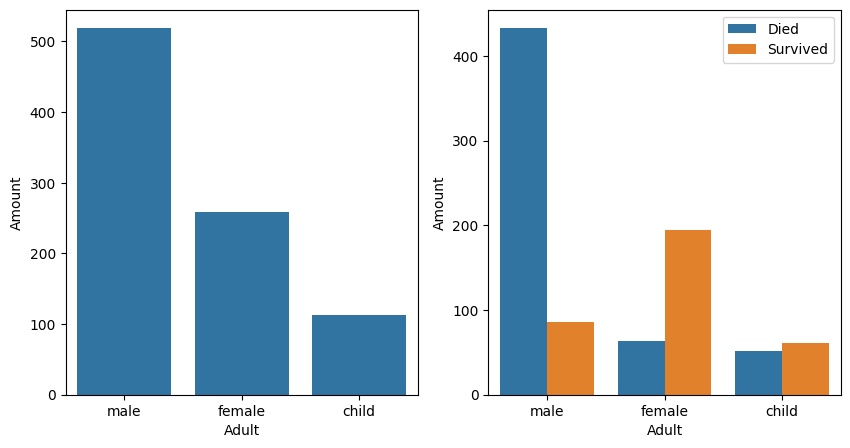

In [26]:
# This is used to make multiple plots in one figure
fig, ax = plt.subplots(1,2, figsize=(10,5))

# A countplot show the counts of observations in each categorical bin using bars.
# It can be thought of as a histogram across a categorical variable.
sns.countplot(x='Adult', data=df_adult, ax=ax[0])
sns.countplot(x='Adult', data=df_adult, hue='Survived', ax=ax[1])

# ax[<index>] indicates which of the 2 subplots you're filling in
ax[0].set_xlabel('Adult')
ax[0].set_ylabel('Amount')

ax[1].set_xlabel('Adult')
ax[1].set_ylabel('Amount')
ax[1].legend(['Died', 'Survived'])

fig.show()

It doesn't seem very interesting to add this though. It doesn't differentiate much, and duplicates already existing information ('Sex' and 'Age'). Useful for visualization, but we leave the dataframe as it is. 

### 1.3 Model training (attempt 1)

In [27]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()
#RF_model.fit(df.drop(['Survived'], axis=1), df['Survived'])

### 1.4 Preprocessing

#### 1.4.1 Missing values

`isnull()` is a boolean function indicating for each record and each feature in the dataset if it's missing or not.

In [28]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


**TODO**: How can you use the `isnull()` function to get the number of missing values for each feature throughout the whole dataset?

In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
round((df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100), 2)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64

The easiest solution to handle missing values is just deleting the records with missing values.

In [31]:
df_dropped = df.dropna()
df_dropped.shape

(183, 12)

The feature 'Cabin' is the culprit here. So what's the deal?

In [32]:
df_dropped['Pclass'].value_counts()

Pclass
1    158
2     15
3     10
Name: count, dtype: int64

In [33]:
df['Pclass'].value_counts().sort_index()

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

In [34]:
df_dropped['Cabin'].unique

<bound method Series.unique of 1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 183, dtype: object>

There might be something interesting here... especially that letter. Let's remember this for later.

In any case, dropping all of these records would leave us with only 183 records.

**TODO**: Do you see the problem with this method? Can you think of a better way to handle missing values? 

We lose a lot of information when we do this. In Machine Learning, you want to hold on to as much data as you can. Deciding to drop columns or records because you think they don't matter is a pitfall to avoid.

Let's start by looking at each column with missing values individually.

##### **1.4.1.1 Cabin**

This column has over 77% of missing values. That is a lot of missing data.

When a column is so sparse, we can choose to discard this column. As we saw earlier though, there may be some interesting info we can extract from this feature.

Sidenote: If you're unsure about deleting a column, there are multiple ways to go about this. If available, you could consult a domain expert. Another way is to:
1. try to fill in the missing values with the techniques seen in this section
2. run an ML algorithm on this cleaned dataset
3. run an ML algorithm on the dataset with the entire feature removed
4. compare the results

We start by adding an extra column, which indicates if this field is missing in a row.

In [35]:
def set_na(row, column):
  if pd.isna(row[column]):
    return True
  else:
    return False

In [36]:
df['Cabin_na'] = df.apply(lambda row: set_na(row, 'Cabin'), axis = 1)

Next, we fill up the missing values with a nonexistent cabin nr (Z-1).

In [37]:
df['Cabin'] = df['Cabin'].fillna('Z-1')

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_na
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Z-1,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Z-1,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Z-1,S,True


Remember those interesting letters in the different 'Cabin' categories? That might give us information about the different decks. Let's split 'Cabin' up into the new features 'Deck' and 'CabinNr'.

In [39]:
def get_deck(row):    
    return row['Cabin'][0]

df['Deck'] = df.apply(get_deck, axis=1)

In [40]:
def get_cabin_number(row):   
    cabins = row['Cabin'].split(' ')
    return cabins[0][1:]

df['CabinNr'] = df.apply(get_cabin_number, axis=1)

In [41]:
df['Deck'].unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [42]:
df['CabinNr'].unique()

array(['-1', '85', '123', '46', '6', '103', '56', '23', '78', '33', '30',
       '52', '28', '83', '', '31', '5', '10', '26', '110', '58', '101',
       '47', '86', '2', '19', '7', '49', '4', '32', '80', '36', '15',
       '93', '35', '87', '77', '67', '94', '125', '99', '118', '22',
       '106', '65', '54', '57', '34', '18', '124', '91', '40', '128',
       '37', '50', '82', '96', '44', '104', '111', '92', '38', '21', '12',
       '63', '14', '20', '79', '25', '73', '95', '39', '70', '16', '68',
       '41', '9', '48', '126', '71', '51', '62', '24', '90', '45', '8',
       '121', '11', '3', '17', '102', '69', '42', '148'], dtype=object)

There is still an empty 'CabinNr' around. We'll fill that with '-1' as well.

In [43]:
df.loc[df['CabinNr'] == '', 'CabinNr'] = '-1'

In [44]:
df[df['CabinNr'] == '']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_na,Deck,CabinNr


Now we can safely remove the 'Cabin' feature from our dataset. We've extracted all the useful information out of it.

In [45]:
df.drop(['Cabin'], axis=1, inplace=True)

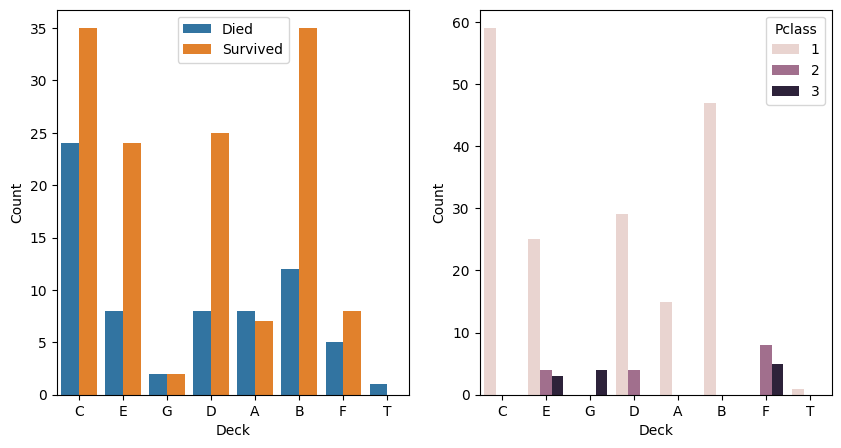

In [46]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.countplot(x='Deck', data=df[df['Deck'] != 'Z'], hue='Survived', ax=ax[0])
sns.countplot(x='Deck', data=df[df['Deck'] != 'Z'], hue='Pclass', ax=ax[1])

ax[0].set_xlabel('Deck')
ax[0].set_ylabel('Count')
ax[0].legend(['Died', 'Survived'])

ax[1].set_xlabel('Deck')
ax[1].set_ylabel('Count')

fig.show()

##### **1.4.1.2 Age**

Next: 'Age'. Age is a numerical feature, we can look at some statistically relevant informative numbers about this feature.

In [47]:
print("Median of age:", df['Age'].median())
print("Mean of age:", df['Age'].mean())
print("Mode of age:", df['Age'].mode()[0])

Median of age: 28.0
Mean of age: 29.69911764705882
Mode of age: 24.0


**TODO**: Which value do you think we should use? Use the `fillna` function to fill in the missing values.

In [48]:
df['Age'] = df['Age'].fillna(df['Age'].median())

##### **1.4.1.3 Embarked**

Age is a categorical feature, there are only 2 records with missing data. We can fill in the missing values with the most common value, after indicating that this feature in the 2 rows was missing.

In [49]:
df['Embarked'].isnull().sum()

2

In [50]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [51]:
df['Embarked_na'] = df.apply(lambda row: set_na(row, 'Embarked'), axis = 1)

In [52]:
df['Embarked_na'].value_counts()

Embarked_na
False    889
True       2
Name: count, dtype: int64

In [53]:
print("Mode of Embarked:", df['Embarked'].mode()[0])

Mode of Embarked: S


In [54]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

Let's check if we don't have any missing values anymore.

In [55]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Cabin_na       0
Deck           0
CabinNr        0
Embarked_na    0
dtype: int64

#### 1.4.2 Feature engineering

Creating new features by transforming, modifying or extracting from existing features.

We want to analyze if the 'Name' feature can be engineered to extract titles and test correlation between titles and survival, before dropping the 'Name' and 'PassengerId' features.

In the following code we extract the 'Title' feature using regular expressions. The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. The `expand=False` flag returns a DataFrame.

In [56]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df['Title'], df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can see that some titles are represented a lot, like Mr and Miss, while others are more sparse. We can replace these by the term 'Rare'. The sign of the times also indicates that it was important to show a woman's marital status, but not a man's (Master does not necessarily mean an unmarried man).

In [57]:
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [58]:
(df.shape, df['Name'].nunique())

((891, 16), 891)

Now we can safely drop the 'Name' feature from training and testing datasets. We also do not need the 'PassengerId' feature in the training dataset. IDs often don't provide any information. Especially when they are all unique, which is the case for 'PassengerId'.

In [59]:
(df.shape, df['PassengerId'].nunique())

((891, 16), 891)

**TODO**: Drop the 'Name' and 'PassengerId' features from the dataframe (use `df.drop`).

In [60]:
df.drop(['Name', 'PassengerId'], axis=1, inplace=True)

In [61]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_na,Deck,CabinNr,Embarked_na,Title
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,True,Z,-1,False,Mr
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,False,C,85,False,Mrs
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,True,Z,-1,False,Miss
3,1,1,female,35.0,1,0,113803,53.1000,S,False,C,123,False,Mrs
4,0,3,male,35.0,0,0,373450,8.0500,S,True,Z,-1,False,Mr


The following dataset looks better and more prepared to use learning models on. Yet there are still some additions possible. When you've finished this notebook, think of some more feature engineering you could do.

#### 1.4.3 Categorical variables

In [62]:
df_orig = df.copy()

In [63]:
df.dtypes

Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Cabin_na          bool
Deck            object
CabinNr         object
Embarked_na       bool
Title           object
dtype: object

##### **1.4.3.1 Categorical values**
Even though there are no missing values anymore, the dataset is not ready yet to use. As we can see there are features that have 'object' types in the dataset, such as 'Sex', 'Embarked' and 'Ticket'.
We know from playing with these columns that they actually contain string values, like 'Female', 'S' and 'SOTON/OQ 392076'.

To proceed with this dataset, we need to transform them into numerical representations. Our Machine Learning models need numbers.

People often use numerical representations for ordinal categories (like 'small', 'medium', 'large'), with a well-defined ordering, and one hot encoding for nominal categories (like 'Belgium', 'Peru', 'Uganda') with no ordering. There is some discussion about this and some models are better able to handle it than others. 

A technique often used in the context of Neural Networks is embeddings for categorical features.

We are **not** going to use embeddings, in order to make everything a little more straightforward.

In [64]:
obj_columns = df.select_dtypes(['object']).columns

These are all the features we'll need to process.

In [65]:
obj_columns

Index(['Sex', 'Ticket', 'Embarked', 'Deck', 'CabinNr', 'Title'], dtype='object')

First, we turn them into categories instead of regular strings.

In [66]:
for column in obj_columns:
    df[column] = df[column].astype('category')

In [67]:
cat_columns = df.select_dtypes(['category']).columns
cat_columns

Index(['Sex', 'Ticket', 'Embarked', 'Deck', 'CabinNr', 'Title'], dtype='object')

In [68]:
ticket_values = df['Ticket'].value_counts()

In [69]:
ticket_values[ticket_values > 1]

Ticket
1601        7
CA. 2343    7
347082      7
CA 2144     6
347088      6
           ..
17453       2
110465      2
13507       2
113776      2
11767       2
Name: count, Length: 134, dtype: int64

In [70]:
df[df['Ticket'] == 'PC 17558']

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_na,Deck,CabinNr,Embarked_na,Title
118,0,1,male,24.0,0,1,PC 17558,247.5208,C,False,B,58,False,Mr
299,1,1,female,50.0,0,1,PC 17558,247.5208,C,False,B,58,False,Mrs


##### **1.4.3.2 One hot encoding**

Features 'Embarked' and 'Title' look perfect to one-hot encode. Let's see what this looks like:

In [71]:
df = pd.get_dummies(df, columns=['Embarked', 'Title'])

In [72]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_na,Deck,CabinNr,Embarked_na,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,male,22.0,1,0,A/5 21171,7.2500,True,Z,-1,False,False,False,True,False,False,True,False,False
1,1,1,female,38.0,1,0,PC 17599,71.2833,False,C,85,False,True,False,False,False,False,False,True,False
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,True,Z,-1,False,False,False,True,False,True,False,False,False
3,1,1,female,35.0,1,0,113803,53.1000,False,C,123,False,False,False,True,False,False,False,True,False
4,0,3,male,35.0,0,0,373450,8.0500,True,Z,-1,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,True,Z,-1,False,False,False,True,False,False,False,False,True
887,1,1,female,19.0,0,0,112053,30.0000,False,B,42,False,False,False,True,False,True,False,False,False
888,0,3,female,28.0,1,2,W./C. 6607,23.4500,True,Z,-1,False,False,False,True,False,True,False,False,False
889,1,1,male,26.0,0,0,111369,30.0000,False,C,148,False,True,False,False,False,False,True,False,False


##### **1.4.3.3 Label encoding**

In [73]:
df['Deck'].cat.categories

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'Z'], dtype='object')

Internally, these categories are already represented by numbers ([0, 1, 2, 3, 4, 5, 6, 7, 8]). Now we just need to change them into the associated codes. We can use scikit-learn's LabelEncoder for this.

In [74]:
cat_columns = ['Sex', 'Ticket', 'Deck', 'CabinNr', "Cabin_na", "Embarked_na"]

* Encoding the variable: 
`df = df.apply(lambda x: d[x.name].fit_transform(x))`

* Inverse the encoded: 
`fit.apply(lambda x: d[x.name].inverse_transform(x))`

* Using the dictionary to label future data: 
`df.apply(lambda x: d[x.name].transform(x))`

In [75]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
label_dict = defaultdict(LabelEncoder)

In [76]:
# Encoding the variable
cat_columns_encoded = [label_dict[column].fit_transform(df[column]) for column in cat_columns]

In [77]:
i = 0
for column in cat_columns:
  df[column] = cat_columns_encoded[i]
  i += 1

All of our categorical variables should be turned into numbers now:

In [78]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_na,Deck,CabinNr,Embarked_na,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,1,22.0,1,0,523,7.2500,1,8,0,0,False,False,True,False,False,True,False,False
1,1,1,0,38.0,1,0,596,71.2833,0,2,81,0,True,False,False,False,False,False,True,False
2,1,3,0,26.0,0,0,669,7.9250,1,8,0,0,False,False,True,False,True,False,False,False
3,1,1,0,35.0,1,0,49,53.1000,0,2,13,0,False,False,True,False,False,False,True,False
4,0,3,1,35.0,0,0,472,8.0500,1,8,0,0,False,False,True,False,False,True,False,False


And we can easily transform back to our original (string) categories:

In [79]:
df.apply(lambda x: label_dict[x.name].inverse_transform(x) if x.name in cat_columns else x)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_na,Deck,CabinNr,Embarked_na,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,male,22.0,1,0,A/5 21171,7.2500,True,Z,-1,False,False,False,True,False,False,True,False,False
1,1,1,female,38.0,1,0,PC 17599,71.2833,False,C,85,False,True,False,False,False,False,False,True,False
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,True,Z,-1,False,False,False,True,False,True,False,False,False
3,1,1,female,35.0,1,0,113803,53.1000,False,C,123,False,False,False,True,False,False,False,True,False
4,0,3,male,35.0,0,0,373450,8.0500,True,Z,-1,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,True,Z,-1,False,False,False,True,False,False,False,False,True
887,1,1,female,19.0,0,0,112053,30.0000,False,B,42,False,False,False,True,False,True,False,False,False
888,0,3,female,28.0,1,2,W./C. 6607,23.4500,True,Z,-1,False,False,False,True,False,True,False,False,False
889,1,1,male,26.0,0,0,111369,30.0000,False,C,148,False,True,False,False,False,False,True,False,False


#### 1.4.4 Backing it all up

Save the labels!

In [80]:
!mkdir label_saves

mkdir: cannot create directory ‘label_saves’: File exists


In [81]:
label_dict

defaultdict(sklearn.preprocessing._label.LabelEncoder,
            {'Sex': LabelEncoder(),
             'Ticket': LabelEncoder(),
             'Deck': LabelEncoder(),
             'CabinNr': LabelEncoder(),
             'Cabin_na': LabelEncoder(),
             'Embarked_na': LabelEncoder()})

In [82]:
import pickle

for key, value in label_dict.items():
  filename = 'label_saves/' + key + '_labels.pickle'
  print(key)
  with open(filename, 'wb') as handle:
    pickle.dump(value, handle)

np.save('label_saves/cat_columns.npy', cat_columns)

Sex
Ticket
Deck
CabinNr
Cabin_na
Embarked_na


Saving the dataframe and the columns...

In [83]:
df.to_feather(path="./titanic_df.feather")
np.save('./titanic_df_cols.npy', np.array(df.columns))

### 1.5 Initial analysis

Now that everything is numerical, we can look at the correlations between all the features. 
* A light colour means a positive correlation
* A dark colour means a negative correlation

(19.5, -0.5)

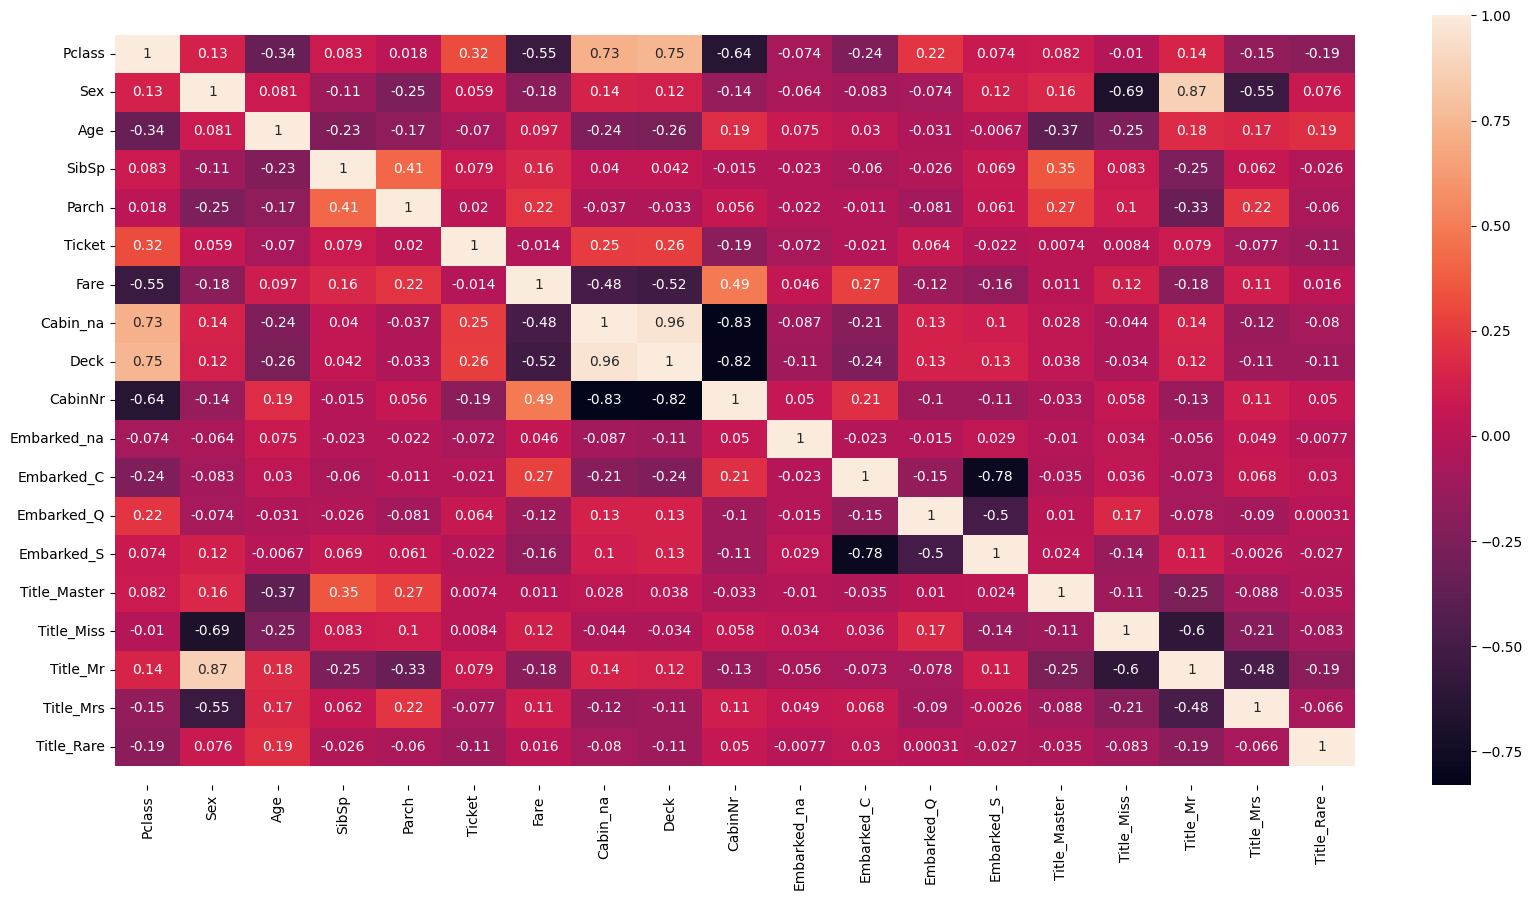

In [84]:
fig, ax = plt.subplots(figsize = (20, 10))
# we drop the feature 'Survived', since this is our dependent variable (the variable we are trying to predict)
X = df.drop(['Survived'], axis=1)
df_corr = X.corr()
fig = sns.heatmap(df_corr, annot = True)

# This is a fix for a bug in the visualization library
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Another way to show correlations is to use a clustering dendrogram. The exact implementation is not that important, what is important to know is that features that are connected closer to the right side are more closely correlated.

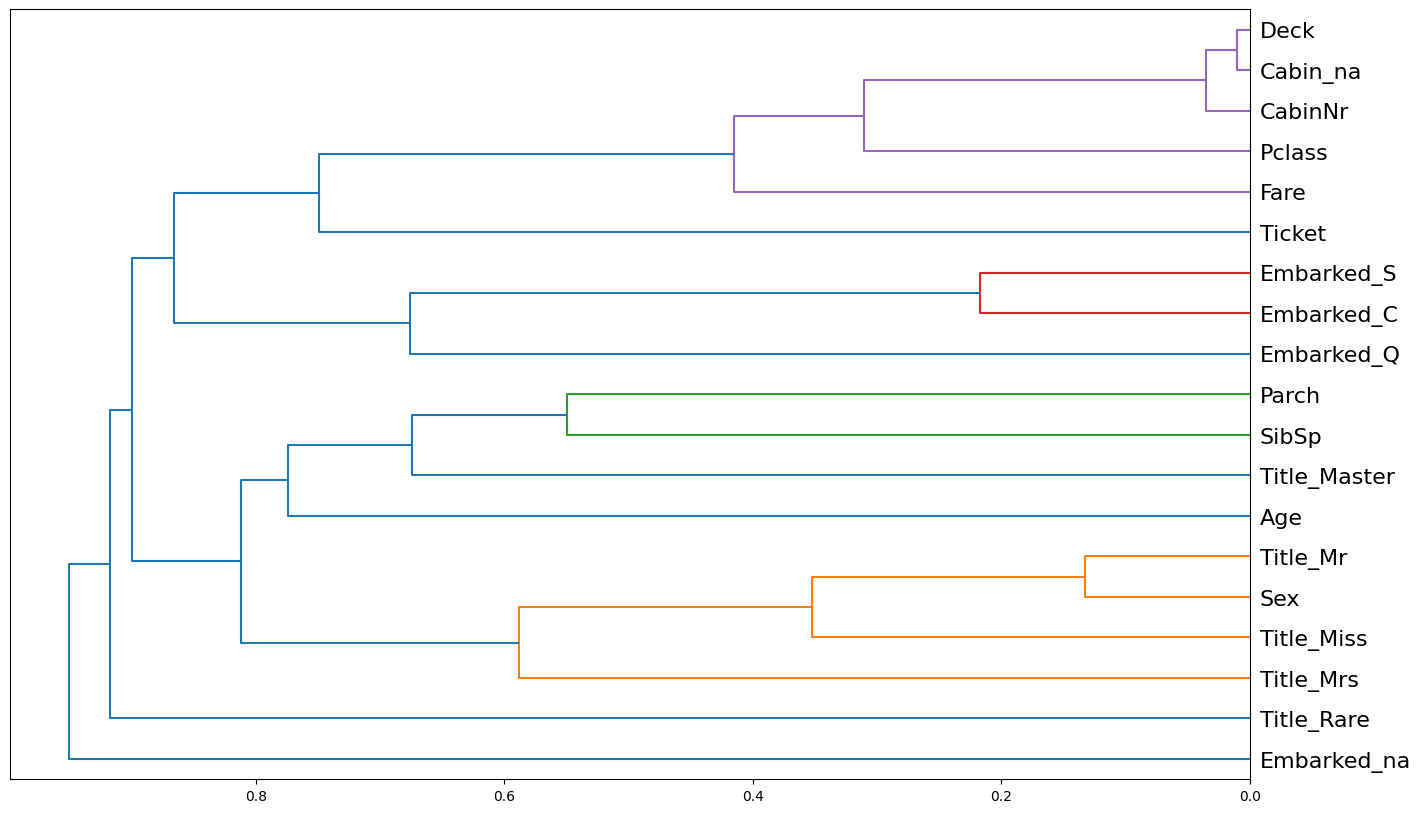

In [85]:
import scipy
from scipy.cluster import hierarchy as hc
corr = np.round(scipy.stats.spearmanr(X).correlation, 4)
corr_condensed = hc.distance.squareform(1-abs(corr))        # we use 1-abs(corr) instead of 1-corr, to incorporate negative correlations as well as positive ones
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=X.columns, orientation='left', leaf_font_size=16)
plt.show()

#### Extra: 1.5.1 Next steps

If you managed to make it here very quickly, think about some other feature engineering you could do. 
* Are there better ways to fill in missing values?
* Can you think of other ways to combine existing features in new interesting ways?


Don't forget to save your model and your columns when you're finished. Use
>`df.to_feather(path="./titanic_df.feather")` 

and


>`np.save('./titanic_df_cols.npy', np.array(df.columns))`